Add basic libraries

In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import os
import matplotlib.pyplot as plt
%matplotlib inline
import io
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.subplots
import plotly.figure_factory as ff

Question 1
How many leads are represented in this dataset? Describe both the assigned
and unassigned populations. What is the average revenue of each group?

The first several blocks of code will be reading in the dataset, data exploration, checking for outliers, dealing with missing data etc. Then I will calculate summary statistics to address Q1.

In [2]:
sales = pd.read_csv("homework_data_set.csv")
sales = sales.dropna(how='all') # remove samples with all missing values
sales = sales[~sales.duplicated()] # remove duplicates
sales.head()

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
0,0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,NaN
1,1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,NaN
2,2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,NaN
3,3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,NaN
4,4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,NaN


I will do a quick overview of the data and then look for any outliers.

In [3]:
print ("Rows     : " ,sales.shape[0])
print ("Columns  : " ,sales.shape[1])
print ("\nFeatures : \n" ,sales.columns.tolist())
print ("\nMissing values :  ", sales.isnull().sum().values.sum())
print ("\nUnique values :  \n",sales.nunique())
print(sales.info())

Rows     :  77891
Columns  :  10

Features : 
 ['Unnamed: 0', 'advertiser_id', 'assigned', 'date_assignment_starts', 'date_assignment_ends', 'first_revenue_date', 'date_created', 'age', 'assign_days', 'revenue']

Missing values :   144009

Unique values :  
 Unnamed: 0                77891
advertiser_id             77891
assigned                      2
date_assignment_starts        3
date_assignment_ends       6502
first_revenue_date         1636
date_created               2101
age                        2131
assign_days                 141
revenue                    2966
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 77891 entries, 0 to 77890
Data columns (total 10 columns):
Unnamed: 0                77891 non-null int64
advertiser_id             77891 non-null int64
assigned                  77891 non-null int64
date_assignment_starts    77891 non-null object
date_assignment_ends      77891 non-null object
first_revenue_date        8433 non-null object
date_created   

According to our quick look, we have 77891 unique advertiser IDs representing 77891 leads. Now, I will calculate some summary statistics. I also have 144009 missing values. There are only 8433 values in first revenue date and 3340 values in revenue.

In [4]:
summary = sales.describe()
print(summary)

         Unnamed: 0  advertiser_id      assigned           age   assign_days  \
count  77891.000000   7.789100e+04  77891.000000  77891.000000  77891.000000   
mean   38945.000000   7.924271e+06      0.476037    309.958532    120.482546   
std    22485.339246   3.918985e+06      0.499429    488.801166     39.527908   
min        0.000000   4.850000e+02      0.000000    -27.000000     -2.000000   
25%    19472.500000   4.317428e+06      0.000000      0.000000    136.000000   
50%    38945.000000   1.078788e+07      0.000000      0.000000    137.000000   
75%    58417.500000   1.080747e+07      1.000000    523.000000    138.000000   
max    77890.000000   1.119963e+07      1.000000   3855.000000    138.000000   

            revenue  
count  3.340000e+03  
mean   4.865177e+07  
std    1.736891e+08  
min    1.200000e+04  
25%    6.398444e+06  
50%    1.514775e+07  
75%    3.704959e+07  
max    6.533791e+09  


here I see that both age and assign have negative values (min of -27 and -2). I will delete these rows. There are also lots of zeros in age. I will want to investigate how age was calculated to see if this is correct. I can use datetime to calculate these myself and see if I can correct these errors. Also from looking at .info above the dates aren't actually stored as timedates. I will use timedate to calculate these ranges, so I can see what exactly these features represent.

Also, assign days has no zero values for leads that were not assigned. Let me sort the data to see if I can understand why this is.

I will also eventually need to decide how to treat the large amount of NaN in revenue and first_revenue_date. 

In [5]:
sales = sales.sort_values(by=['age'])
sales.head()

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
77890,77890,11199632,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2017-02-28,-27,138,NaN
77889,77889,11199601,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2017-02-28,-27,138,NaN
77888,77888,11146603,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2017-02-24,-23,138,NaN
77887,77887,11142171,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2017-02-23,-22,138,NaN
77886,77886,11140889,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,2017-02-23,2017-02-23,-22,138,9643000.0


Looking at these rows that have negative values for age we can see how this was calculated. There are accounts with age < 0 even if they have revenue. We can see that 'age' = 'date_assignment_starts' - 'date_created'. Obviously there was revenue that came in after this, I am going to create a new feature 'age_long' using the following formula 'total_age' = 'date_assignment_ends' - 'date_created'

This makes sense because I am interested in the total age of the account, including the time that it was assigned. I will need to use datetime and timedelta to do this. I will also convert all of the dates to datetime format so I can use later if needed.

In [6]:
from datetime import timedelta, datetime
sales[['date_assignment_starts']==0] = np.nan
sales['date_assignment_starts'] = pd.to_datetime(sales['date_assignment_starts'])
sales['date_assignment_ends'] = pd.to_datetime(sales['date_assignment_ends'])
sales['date_created'] = pd.to_datetime(sales['date_created'])
sales['first_revenue_date'] = pd.to_datetime(sales['first_revenue_date'])

#create new variable total_age and convert from timedelta format to number
sales['total_age'] = (sales.date_assignment_ends - sales.date_created).apply(lambda x: x/np.timedelta64(1,'D'))

#create new dataframe called salesog
salesog = pd.DataFrame(sales)
print(sales.info())
sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77891 entries, 77890 to 0
Data columns (total 12 columns):
Unnamed: 0                77891 non-null int64
advertiser_id             77891 non-null int64
assigned                  77891 non-null int64
date_assignment_starts    77891 non-null datetime64[ns]
date_assignment_ends      77891 non-null datetime64[ns]
first_revenue_date        8433 non-null datetime64[ns]
date_created              77891 non-null datetime64[ns]
age                       77891 non-null int64
assign_days               77891 non-null int64
revenue                   3340 non-null float64
False                     0 non-null float64
total_age                 77891 non-null float64
dtypes: datetime64[ns](4), float64(3), int64(5)
memory usage: 7.7 MB
None


,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue,False,total_age
77890,77890,11199632,1,2017-02-01,2017-06-19 12:12:37.888680,NaT,2017-02-28,-27,138,NaN,NaN,111.508772
77889,77889,11199601,1,2017-02-01,2017-06-19 12:12:37.888680,NaT,2017-02-28,-27,138,NaN,NaN,111.508772
77888,77888,11146603,1,2017-02-01,2017-06-19 12:12:37.888680,NaT,2017-02-24,-23,138,NaN,NaN,115.508772
77887,77887,11142171,1,2017-02-01,2017-06-19 12:12:37.888680,NaT,2017-02-23,-22,138,NaN,NaN,116.508772
77886,77886,11140889,1,2017-02-01,2017-06-19 12:12:37.888680,2017-02-23,2017-02-23,-22,138,9643000.0,NaN,116.508772


We can see that total age more accurately reflects the entire age of the account. Lets now look at assign_days.

In [7]:
sales = sales.sort_values(by=['assign_days'])
sales.head(n=20)

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue,False,total_age
39030,39030,10787965,1,2017-02-02,2017-02-01 09:51:20,NaT,2017-02-01,1,-2,NaN,NaN,0.410648
36123,36123,10785053,1,2017-02-02,2017-02-01 04:27:35,NaT,2017-02-01,1,-2,NaN,NaN,0.185822
34666,34666,10781793,1,2017-02-02,2017-02-02 02:06:38,NaT,2017-01-31,2,-1,NaN,NaN,2.087940
34659,34659,10781682,1,2017-02-02,2017-02-02 18:16:53,NaT,2017-01-31,2,-1,NaN,NaN,2.761725
35516,35516,10784445,1,2017-02-03,2017-02-03 00:02:34,NaT,2017-02-01,2,-1,NaN,NaN,2.001782
34657,34657,10781644,1,2017-02-02,2017-02-02 03:05:36,NaT,2017-01-31,2,-1,NaN,NaN,2.128889
34650,34650,10781520,1,2017-02-02,2017-02-02 03:26:43,NaT,2017-01-31,2,-1,NaN,NaN,2.143553
34235,34235,10765184,1,2017-02-02,2017-02-02 03:18:47,NaT,2017-01-31,2,-1,NaN,NaN,2.138044
34517,34517,10775233,1,2017-02-02,2017-02-02 03:05:51,NaT,2017-01-31,2,-1,NaN,NaN,2.129062
34270,34270,10765921,1,2017-02-02,2017-02-02 03:20:53,NaT,2017-01-31,2,-1,NaN,NaN,2.139502


Some of these accounts start before they end. This doesn't make much sense. I will delete these rows. Alternatively, I could use clip to assign all these to zero. There are fewer than 20 points, so I will just delete.

In [8]:
sales = sales[sales.assign_days >= 0] #delete rows with negative values
print(sales.info())
sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77876 entries, 29696 to 0
Data columns (total 12 columns):
Unnamed: 0                77876 non-null int64
advertiser_id             77876 non-null int64
assigned                  77876 non-null int64
date_assignment_starts    77876 non-null datetime64[ns]
date_assignment_ends      77876 non-null datetime64[ns]
first_revenue_date        8433 non-null datetime64[ns]
date_created              77876 non-null datetime64[ns]
age                       77876 non-null int64
assign_days               77876 non-null int64
revenue                   3340 non-null float64
False                     0 non-null float64
total_age                 77876 non-null float64
dtypes: datetime64[ns](4), float64(3), int64(5)
memory usage: 7.7 MB
None


,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue,False,total_age
29696,29696,8999404,1,2017-02-02,2017-02-02 10:28:35,2017-03-29,2016-09-17,138,0,NaN,NaN,138.436516
49495,49495,10798517,1,2017-02-02,2017-02-02 22:40:50,NaT,2017-02-01,1,0,NaN,NaN,1.945023
50094,50094,10799119,1,2017-02-02,2017-02-02 22:41:38,NaT,2017-02-01,1,0,NaN,NaN,1.945579
48271,48271,10797284,1,2017-02-02,2017-02-02 14:31:19,2017-02-01,2017-02-01,1,0,30548000.0,NaN,1.605081
77172,77172,10826320,0,2017-02-03,2017-02-03 15:19:07,NaT,2017-02-03,0,0,NaN,NaN,0.638275


Assign_days has values for both assigned=0 and 1. We can see that assign_days = date_assignment_ends - date_assignment_starts even for leads that weren't assigned. I will correct assign_days so there is a zero value for leads that were not assigned in case I want to use this variable later. I can do this by multiplying assign_days*assigned

In [9]:
sales['assign_days'] = sales.assign_days * sales.assigned
summary = sales.describe()
print(summary)

         Unnamed: 0  advertiser_id      assigned           age   assign_days  \
count  77876.000000   7.787600e+04  77876.000000  77876.000000  77876.000000   
mean   38945.756343   7.923721e+06      0.475936    310.017875     55.514202   
std    22487.432756   3.919162e+06      0.499424    488.829535     65.170448   
min        0.000000   4.850000e+02      0.000000    -27.000000      0.000000   
25%    19468.750000   4.316706e+06      0.000000      0.000000      0.000000   
50%    38951.500000   1.078789e+07      0.000000      0.000000      0.000000   
75%    58421.250000   1.080748e+07      1.000000    524.000000    138.000000   
max    77890.000000   1.119963e+07      1.000000   3855.000000    138.000000   

            revenue  False     total_age  
count  3.340000e+03    0.0  77876.000000  
mean   4.865177e+07    NaN    431.289259  
std    1.736891e+08    NaN    492.992126  
min    1.200000e+04    NaN      0.196505  
25%    6.398444e+06    NaN    137.508772  
50%    1.514775e+07  

My data is looking better but I need to decide what to do with the NaN values. Looking above, There are a significant number of NaN values in revenue and first_revenue_date. There are only 8433 values in first_revenue_date and only 3340 values in revenue. This is 90% of the data, so I can't just throw these rows with naN out. I would assume that perhaps these null values are zero - no sales, this would make sense, out of the 77K values, only 3323 resulted in sales. However, its not clear how there could be a value for first_revenue_date, but not revenue. Looking at the summary stats for revenue, we see that there are no zeros in the data (min is 12000), therefore I have confidence that at least for revenue, these null values are actually zeros. I will replace these NaN with 0. 

For first_revenue_date, I will replace the NaN with 0 also and leave the dates that have values but are null (0) for revenue, but may need to revisit this later. 

In [10]:
sales.fillna(0, inplace=True)#I know from sales.info above that the only NaN are in first_revenue_date and revenue
summary = sales.describe()
print(summary)
print(sales.info())

         Unnamed: 0  advertiser_id      assigned           age   assign_days  \
count  77876.000000   7.787600e+04  77876.000000  77876.000000  77876.000000   
mean   38945.756343   7.923721e+06      0.475936    310.017875     55.514202   
std    22487.432756   3.919162e+06      0.499424    488.829535     65.170448   
min        0.000000   4.850000e+02      0.000000    -27.000000      0.000000   
25%    19468.750000   4.316706e+06      0.000000      0.000000      0.000000   
50%    38951.500000   1.078789e+07      0.000000      0.000000      0.000000   
75%    58421.250000   1.080748e+07      1.000000    524.000000    138.000000   
max    77890.000000   1.119963e+07      1.000000   3855.000000    138.000000   

            revenue    False     total_age  
count  7.787600e+04  77876.0  77876.000000  
mean   2.086611e+06      0.0    431.289259  
std    3.729150e+07      0.0    492.992126  
min    0.000000e+00      0.0      0.196505  
25%    0.000000e+00      0.0    137.508772  
50%    0.

Now that my dataframe is complete, I will look at the assigned and unassigned data as histograms and scatter plot to look for any obvious errors. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1fdaf5c0>,
      dtype=object)

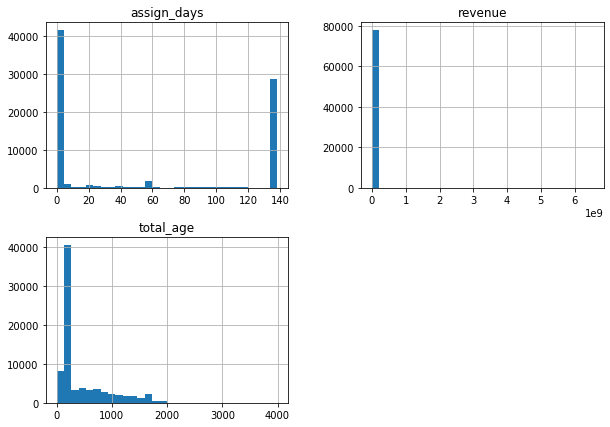

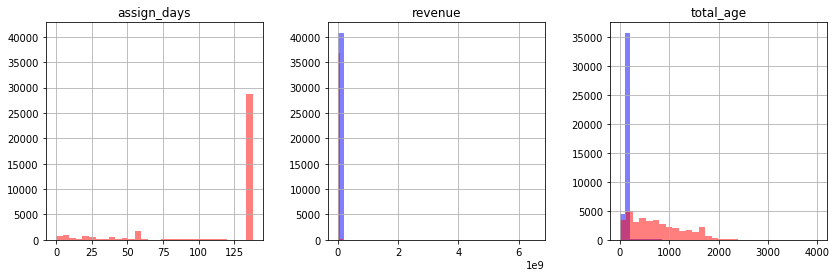

In [11]:
num_cols   = ['total_age','assign_days','revenue']

sales[num_cols].hist(bins=30, figsize=(10, 7))

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
sales[sales.assigned == 0][num_cols].hist(bins=30, color="blue", alpha=0.5, ax=ax)
sales[sales.assigned == 1][num_cols].hist(bins=30, color="red", alpha=0.5, ax=ax)

The histograms give me some quick info about the dataset - the age is highly skewed with most leads very young (0 days) and assign_days is highly skewed with most leads around 137. I didn't do it here, but we could calculate the mode to get these exact values. Just from the histograms we can see that the leads that were assigned tend to be older and revenue tends to be higher. The histograms don't give me much info about ouliers though. 

I can use boxplots and scatter plots to look for outliers.

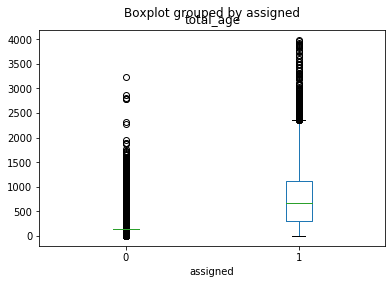

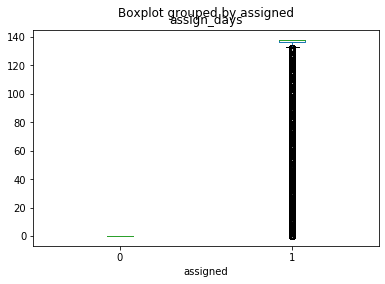

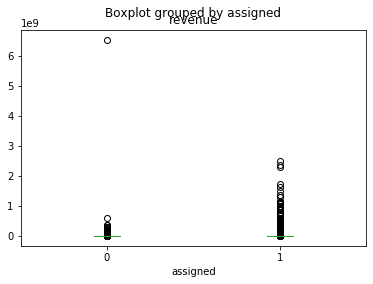

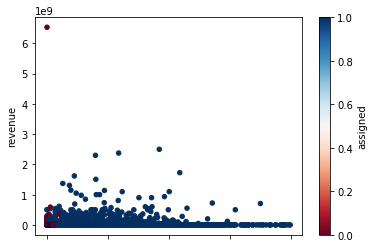

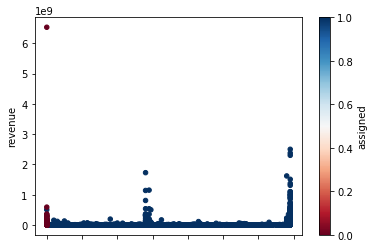

In [12]:
sales.boxplot(by ='assigned', column =["total_age"], grid = False) 
sales.boxplot(by ='assigned', column =["assign_days"], grid = False) 
sales.boxplot(by ='assigned', column =["revenue"], grid = False) 
sales.plot.scatter(x='total_age',y='revenue',c='assigned',colormap='RdBu')
sales.plot.scatter(x='assign_days',y='revenue',c='assigned',colormap='RdBu')

Its obvious from the data that there is an outlier/s in the revenue. I will delete those values. Because I am not very familiar with this dataset, it is difficult for me to tell if there are other outliers in the data or if they are "real" but from this first check, the only data I am going to delete are these very high revenue values. Its important not to get rid of data just becuase it is an outlier, it may have real signal. If this was a real dataset type that was new to me, I would compare with other datasets that are similar to see what range of variation is expected, as there could be other outliers/errors. Lets delete these high values and then recheck our plots. Depending on the type of data and application, we can use inter quartile range to eliminate outliers. Here, I am going to remove just the high revenue data but in an earlier version, I used IQR to remove. I will show my code for that below.

#here is the IQR method for removing outliers.

Its obvious from the data that there is an outlier in the revenue. I will delete those values. Because I am not very familiar with this dataset, it is difficult for me to tell if there are other outliers in the data or if they are "real". Its important not to get rid of data just becuase it is an outlier, it may have real signal. If this was a real dataset type that was new to me, I would compare with other datasets that are similar to see what range of variation is expected. However, for this exercise in the interest of time, I will apply IQR filtering to all numerical columns.

I will use IQR to delete outliers in revenue (alternative is +/- 3 SD). Next, I will recheck my histograms and summary statistics, once the data is clean I can begin analysis.


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_outlier = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_outlier.boxplot(by ='assigned', column =["age"], grid = False) 
df_outlier.boxplot(by ='assigned', column =["assign_days"], grid = False) 
df_outlier.boxplot(by ='assigned', column =["revenue"], grid = False) 

summary = df_outlier.describe()
print(summary)
print(df_outlier.info())

IQR substantially reduced the dataset (from 77k to 59k but the box plots look much better. Again, I don't want to apply IQR to all columns without know that something is truly an error, but in the interest of time without additional info about the dataset, this approach works.

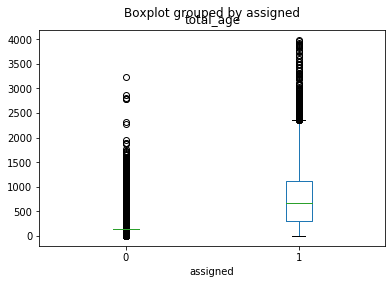

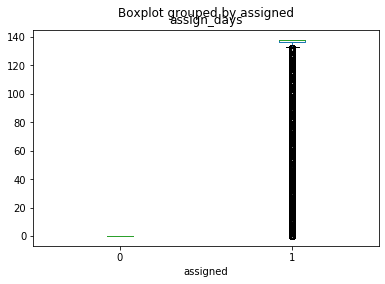

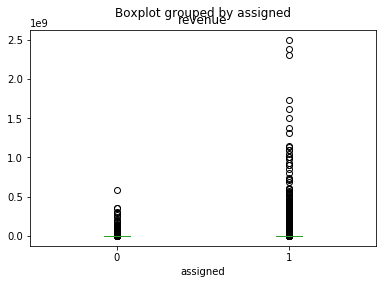

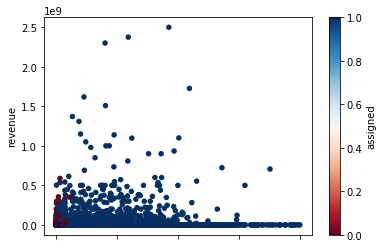

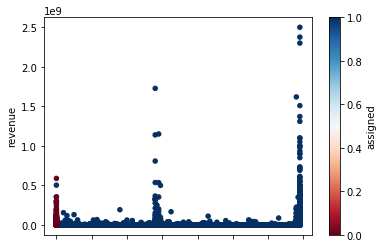

In [13]:
#this is how I actually removed outliers
sales = sales[sales.revenue < 6533791000] #we can see from the scatterplot that there is a single outlier value, so I used the max from the summary stats to find the actualy value
sales.boxplot(by ='assigned', column =["total_age"], grid = False) 
sales.boxplot(by ='assigned', column =["assign_days"], grid = False) 
sales.boxplot(by ='assigned', column =["revenue"], grid = False) 
sales.plot.scatter(x='total_age',y='revenue',c='assigned',colormap='RdBu')
sales.plot.scatter(x='assign_days',y='revenue',c='assigned',colormap='RdBu')

In [14]:
summary = sales.describe()
print(summary)

         Unnamed: 0  advertiser_id      assigned           age   assign_days  \
count  77875.000000   7.787500e+04  77875.000000  77875.000000  77875.000000   
mean   38945.283210   7.923684e+06      0.475942    310.021856     55.514915   
std    22487.189518   3.919173e+06      0.499424    488.831411     65.170563   
min        0.000000   4.850000e+02      0.000000    -27.000000      0.000000   
25%    19468.500000   4.316560e+06      0.000000      0.000000      0.000000   
50%    38951.000000   1.078789e+07      0.000000      0.000000      0.000000   
75%    58420.500000   1.080747e+07      1.000000    524.000000    138.000000   
max    77890.000000   1.119963e+07      1.000000   3855.000000    138.000000   

            revenue    False     total_age  
count  7.787500e+04  77875.0  77875.000000  
mean   2.002737e+06      0.0    431.294742  
std    2.903133e+07      0.0    492.992917  
min    0.000000e+00      0.0      0.196505  
25%    0.000000e+00      0.0    137.508772  
50%    0.

We have cleaned our data, created a new variable and removed outliers. Lets finish answering Q1 and save our cleaned data as a new dataframe and csv file.

In [15]:
#create new dataframe called df with just our cols of interest
df = pd.DataFrame(sales[['advertiser_id', 'revenue', 'total_age','assigned', 'assign_days']]) 
print(df.shape)
df.to_csv('clean_sales_indeed_ProductScienceHomework_22Oct2019.csv') #export to csv

assigned     = df[df['assigned'] == 1] #split data into assigned
not_assigned = df[df['assigned'] == 0] #split data into unassigned

summary = assigned.describe()
print(summary)
summary = not_assigned.describe()
print(summary)

(77875, 5)
       advertiser_id       revenue     total_age  assigned   assign_days
count   3.706400e+04  3.706400e+04  37064.000000   37064.0  37064.000000
mean    4.884758e+06  3.240157e+06    755.527479       1.0    116.642133
std     3.706010e+06  4.127739e+07    546.049695       0.0     42.352120
min     4.850000e+02  0.000000e+00      0.196505       1.0      0.000000
25%     1.492554e+06  0.000000e+00    305.508772       1.0    136.000000
50%     4.113742e+06  0.000000e+00    665.508772       1.0    138.000000
75%     8.189328e+06  0.000000e+00   1123.508772       1.0    138.000000
max     1.119963e+07  2.500000e+09   3993.508772       1.0    138.000000
       advertiser_id       revenue     total_age  assigned  assign_days
count   4.081100e+04  4.081100e+04  40811.000000   40811.0      40811.0
mean    1.068360e+07  8.789278e+05    136.830942       0.0          0.0
std     9.120300e+05  7.631119e+06    103.890138       0.0          0.0
min     6.992000e+03  0.000000e+00      0.46

Q1. There are 77875 total leads in the cleaned dataset. There were 77891 leads in the raw dataset. 37064 were assigned to sales and 40811 were not assigned. The mean revenue for leads that were assigned was 3240157 compared to 878927.8  for those not assigned. The mean total_age of the account for leads that were assigned was 755 compared to 137 for those not assigned.

Q2. What are the most important metrics to consider when answering the problem statement?

To answer the question - how much more did these leads spend because there was intervention. We cannot simply compare the two populations and compare the difference in revenue because they were not randomly assigned. To put it simply, the leads were assigned based on potential value, and we know there are differences in the populations (e.g. age). If we were designing this from scratch we could randomly assign leads and then test for differences in the means. Since we didn't do this, we cannot look at the difference between the means (3240157-878927.8) or the difference in total revenue and attribute it all to sales intervention.

The question we are really interested in is if our assigned leads would have converted to revenue even without our intervention. This is a trickier problem to solve. We first need to consider the overall relationship between our data and revenue, and then we can test to see if sales intervention is a significant predictor of revenue.

The main predictor we have here is total_age. I would first look at the correlation between total_age and revenue by developing a regression model. To see if sales is having an incremental increase, I would perform a stepwise multiple linear regression to see what additional variance in sales is explained once sales assignment is added to the model. I will explore if assignement as a categorical variable (0/1 not assigned/assigned) is more informative or of assign_days is more informative in predicting incremental increase.

There are several things that I might want to do before developing my regression models. One would be to scale my features using std or maxminscalar. I also might want to log transform my response variable (revenue) since I doesn't appear to be normally distributed. In the interest of time, I am not going to do those things now. I also am not sure about whether I want to include the data with revenue = 0. If I do include it, I should use zero inflated poisson regression. The revenue data has many zeros and regular MLR is not appropriate. I will use zero inflated poisson regression which is designed for this type of data. 

My first step will be to develop a GLM (poisson regression model) using the python library Statsmodels and then I will develop zero inflated poission model for the entire dataset. I chose to use statsmodels rather than sklearn because sklearn implements ordinary least squares regression (OLS). For this data which is not normally distributed and has many zeros, iteratively reweighted least squares regression (IRLS) is more appropriate. To my knowledge, IRLS is not implemented in sklearn, which is why I chose to use stats models. Sklearn also doesn't include zero inflated poisson regression. 

In [16]:
from patsy import dmatrices #patsy creates data matrices for statsmodels
import statsmodels.api as sm

formula = """revenue ~ total_age  + assign_days + C(assigned)""" #assigned goes in as a categorical variable
response, predictors = dmatrices(formula, df, return_type='dataframe')
po_results = sm.GLM(response, predictors, family=sm.families.Poisson()).fit()
print(po_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                revenue   No. Observations:                77875
Model:                            GLM   Df Residuals:                    77871
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4963e+11
Date:                Tue, 29 Oct 2019   Deviance:                   1.2993e+12
Time:                        12:34:13   Pearson chi2:                 2.10e+13
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.6558   5.33e-06  

In [17]:
formula = """revenue ~ total_age  + assign_days + C(assigned)"""
response, predictors = dmatrices(formula, df, return_type='dataframe')
zip_results = sm.ZeroInflatedPoisson(response, predictors).fit()
print(zip_results.summary())

//anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:532: RuntimeWarning:

floating point number truncated to an integer

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce

//anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1199: RuntimeWarning:

overflow encountered in multiply

//anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1199: RuntimeWarning:

invalid value encountered in multiply

//anaconda3/lib/python3.7/site-packages/statsmodels/discrete/count_model.py:267: RuntimeWarning:

invalid value encountered in multiply

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce



         Current function value: 6536164.165031
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


//anaconda3/lib/python3.7/site-packages/statsmodels/discrete/count_model.py:518: RuntimeWarning:

invalid value encountered in true_divide

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

//anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:532: RuntimeWarning:

floating point number truncated to an integer

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                 revenue   No. Observations:                77875
Model:             ZeroInflatedPoisson   Df Residuals:                    77871
Method:                            MLE   Df Model:                            3
Date:                 Tue, 29 Oct 2019   Pseudo R-squ.:                  -1.702
Time:                         12:34:19   Log-Likelihood:            -5.0900e+11
converged:                       False   LL-Null:                   -1.8837e+11
Covariance Type:             nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const        0.1000        nan        nan        nan         nan         nan
Intercept           14.0892        nan        nan        nan         nan         nan
C(assigned)[T.1]    

//anaconda3/lib/python3.7/site-packages/statsmodels/discrete/count_model.py:518: RuntimeWarning:

invalid value encountered in true_divide

//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



My ZIP model failed to converge. Although I do have parameter estimates, I am not able to interpret these results. In the interest of time, I am going to do a regression just for the revenue data > 0.

In [18]:
df = df[df.revenue > 0] #selecting cells with only revenue >0
df.shape

(3339, 5)

In [19]:
#Lets develop a regression with just the non-zero revenue, since we don't have zeros we use negative binomial
formula = """revenue ~ total_age  + C(assigned)""" #assigned goes in as a categorical variable
response, predictors = dmatrices(formula, df, return_type='dataframe')
nb_results = sm.GLM(response, predictors, family=sm.families.NegativeBinomial()).fit()
print(nb_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                revenue   No. Observations:                 3339
Model:                            GLM   Df Residuals:                     3336
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61470.
Date:                Tue, 29 Oct 2019   Deviance:                       5924.3
Time:                        12:34:20   Pearson chi2:                 1.19e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           16.7649      0.024  

The log likelihood is lower and deviance is lower than the models above, this model is a better representation of our data. Now, lets look at the parameters and see how we did. The coeficient for assigned is 0.90, this means that of the accounts that had a dsales, for every dollar of revenue, $0.90 are due to sales intervention. Lets look at the model with total_age only so we can describe that relationship and answer Q3.

In [20]:
#Lets look at total_age only
formula = """revenue ~ total_age""" 
response, predictors = dmatrices(formula, df, return_type='dataframe')
nb_results = sm.GLM(response, predictors, family=sm.families.NegativeBinomial()).fit()
print(nb_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                revenue   No. Observations:                 3339
Model:                            GLM   Df Residuals:                     3337
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61702.
Date:                Tue, 29 Oct 2019   Deviance:                       6389.6
Time:                        12:34:20   Pearson chi2:                 1.62e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0744      0.021    800.962      0.0

Q3. The coefficient for total age is 0.0012 and it is significant. How do we interpret this? This means that for accounts that had revenue, for every additional account day we are likely to have an increase of 0.0012 cents of revenue.
Q4. As mentioned above, sales has a strong incremental increase on revenue. The coeficient for assigned is 0.90, this means that for accounts that had revenue, $0.90 of every dollar of revenue is due to sales intervention.

In [23]:
salesog.info()
salesog.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77891 entries, 77890 to 0
Data columns (total 12 columns):
Unnamed: 0                77891 non-null int64
advertiser_id             77891 non-null int64
assigned                  77891 non-null int64
date_assignment_starts    77891 non-null datetime64[ns]
date_assignment_ends      77891 non-null datetime64[ns]
first_revenue_date        8433 non-null datetime64[ns]
date_created              77891 non-null datetime64[ns]
age                       77891 non-null int64
assign_days               77891 non-null int64
revenue                   3340 non-null float64
False                     0 non-null float64
total_age                 77891 non-null float64
dtypes: datetime64[ns](4), float64(3), int64(5)
memory usage: 7.7 MB


,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue,False,total_age
77890,77890,11199632,1,2017-02-01,2017-06-19 12:12:37.888680,NaT,2017-02-28,-27,138,NaN,NaN,111.508772
77889,77889,11199601,1,2017-02-01,2017-06-19 12:12:37.888680,NaT,2017-02-28,-27,138,NaN,NaN,111.508772
77888,77888,11146603,1,2017-02-01,2017-06-19 12:12:37.888680,NaT,2017-02-24,-23,138,NaN,NaN,115.508772
77887,77887,11142171,1,2017-02-01,2017-06-19 12:12:37.888680,NaT,2017-02-23,-22,138,NaN,NaN,116.508772
77886,77886,11140889,1,2017-02-01,2017-06-19 12:12:37.888680,2017-02-23,2017-02-23,-22,138,9643000.0,NaN,116.508772


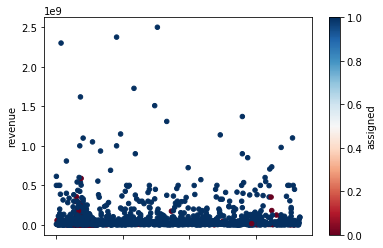

In [37]:
#Lets calculate day of year
df['first_revenue_date'] = salesog['first_revenue_date'] #add first_revenue_date
df['day_of_year'] = df['first_revenue_date'].apply(lambda x: x.timetuple().tm_yday)#add day of year
df.head()
df.plot.scatter(x='day_of_year',y='revenue',c='assigned',colormap='RdBu')


In [39]:
#Lets add day of year to our model
formula = """revenue ~ total_age + day_of_year + C(assigned)""" #assigned goes in as a categorical variable
response, predictors = dmatrices(formula, df, return_type='dataframe')
doy_results = sm.GLM(response, predictors, family=sm.families.NegativeBinomial()).fit()
print(doy_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                revenue   No. Observations:                 3339
Model:                            GLM   Df Residuals:                     3335
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61465.
Date:                Tue, 29 Oct 2019   Deviance:                       5914.3
Time:                        13:50:36   Pearson chi2:                 1.20e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           16.7385      0.025  

Q5. Here we see that Yes, day_of_year is a significant predictor in our model. There is a slight improvement in this model as measured by a decrease in the log likelihood.